<a href="https://colab.research.google.com/github/SamarSaeed1146/Internet_Chatbot/blob/main/internet_chatbot_with_tavily_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%%capture --no-stderr
%pip install -U langchain_google_genai langgraph langchain_core langchain tavily-python langchain_community

In [22]:
import os
from google.colab import userdata

os.environ['LANGCHAIN_API_KEY'] = userdata.get('LANGCHAIN_API_KEY')
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'internet_search'
os.environ['TAVILY_API_KEY'] = userdata.get('TAVILY_API_KEY')

gemini_api_key = userdata.get('GEMINI_API_KEY')

In [23]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=gemini_api_key,
    max_retries=2,
    temperature=0.5,
)

llm.invoke("hi")

AIMessage(content='Hi there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-7ddace6f-910b-4e01-92ec-f93365604882-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

In [24]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("what is langchain?")

[{'url': 'https://www.geeksforgeeks.org/introduction-to-langchain/',
  'content': 'Data Structures and Algorithms\nML & Data Science\nWeb Development\nLanguages\nInterview Corner\nCS Subjects\nJobs\nPractice\nContests\nIntroduction to Langchain\nLangChain is an open-source framework designed to simplify the creation of applications using large language models (LLMs). LangChain follows a general pipeline where a user asks a question to the language model where the vector representation of the question is used to do a similarity search in the vector database and the relevant information is fetched from the vector database and the response is later fed to the language model. LangChain Key Concepts:\nThe main properties of LangChain Framework are :\nSetting up the environment\nInstallation of langchain is very simple and similar as you install other libraries using the pip command.\n Next, we create a .env file and store our API key in it as follows:\nPython\nNow, I am creating a new file 

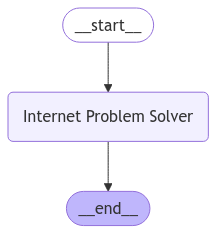

In [25]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from typing_extensions import Annotated, TypedDict

def internet_problem_solver(user_input: str):
    if "internet" not in user_input.lower():
        return "I can only assist with internet-related problems. Please ask about issues such as slow speeds, connection drops, or Wi-Fi setups."

    responses = []
    try:
        print("Using TavilySearchResults for query:", user_input)
        tool_response = tool.invoke(user_input)
        print("Tool response:", tool_response)

        if tool_response:
            responses.append(f"**Search Result:** {tool_response}")
    except Exception as e:
        print(f"Error invoking TavilySearchResults: {str(e)}")
        responses.append(f"Error with TavilySearchResults: {str(e)}")

    try:
        print("Using LLM for query:", user_input)
        llm_response = llm.invoke(user_input)
        print("LLM response:", llm_response)

        if llm_response:
            responses.append(f"**LLM Response:** {llm_response}")
    except Exception as e:
        print(f"Error invoking LLM: {str(e)}")
        responses.append(f"Error with LLM: {str(e)}")

    if responses:
        return "\n\n".join(responses)
    else:
        return "No meaningful response from tools or LLM."

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)
graph_builder.add_node("Internet Problem Solver", internet_problem_solver)
graph_builder.add_edge(START, "Internet Problem Solver")
graph_builder.add_edge("Internet Problem Solver", END)
graph = graph_builder.compile()

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [26]:
from pprint import pprint

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q", "bye"]:
            pprint("Goodbye!")
            break

        answer = internet_problem_solver(user_input)
        pprint(f"Assistant: {answer}")
    except Exception as e:
        pprint(f"Error: {e}")

User: hi
('Assistant: I can only assist with internet-related problems. Please ask '
 'about issues such as slow speeds, connection drops, or Wi-Fi setups.')
User: why internet is too slow
Using TavilySearchResults for query: why internet is too slow
Tool response: [{'url': 'https://www.usatoday.com/tech/internet/how-to-fix-slow-internet/', 'content': 'Why is my internet so slow on my phone? Slow internet speed on your phone can be caused by a low battery, having your phone in low-power mode, having too many open apps or having a full memory'}, {'url': 'https://www.lifewire.com/troubleshooting-slow-internet-connection-818125', 'content': 'Causes of a Slow Internet Connection . Several factors could affect your slow internet connection. Games and other programs that work with video require significant bandwidth. When they run, they limit the bandwidth available for other apps. Other network activity could affect overall bandwidth.'}]
Using LLM for query: why internet is too slow
LLM res